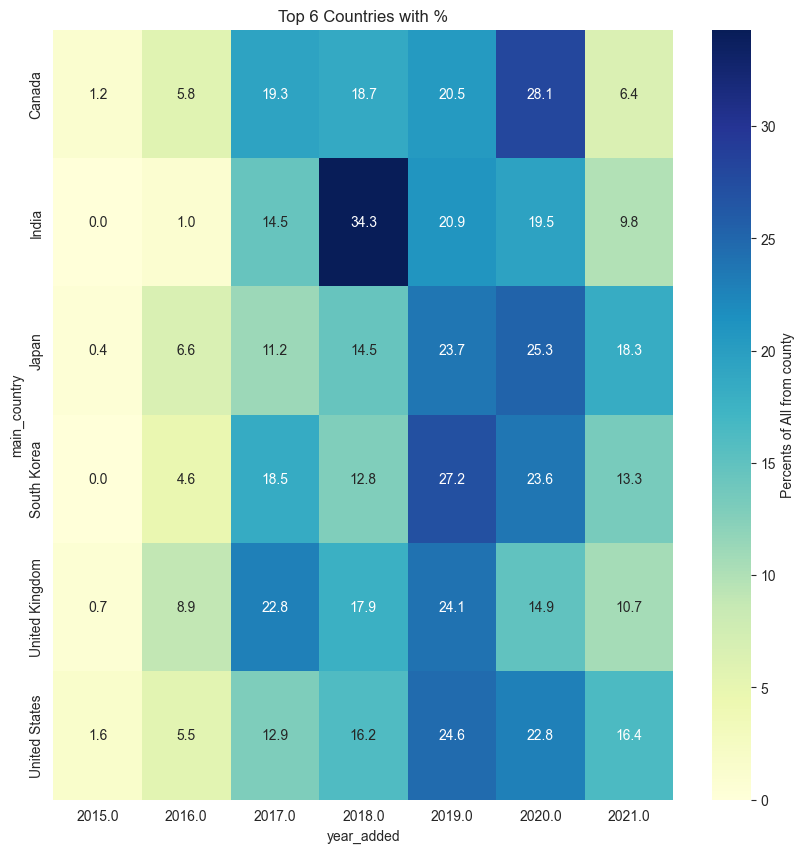

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Our Datasets/netflix_titles.csv')
df['year_added'] = df['date_added'].str.split(' ').str[2]
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')
df['main_country'] = df['country'].str.split(' ,').str[0]
top6_country = df['main_country'].value_counts().head(6).index
df_top6 = df[df['main_country'].isin(top6_country)]
df_top6 = df_top6[(df_top6['year_added'] >= 2015) & (df_top6['year_added'] <= 2021)]

pivot = pd.pivot_table(
    df_top6,
    index='main_country',
    columns='year_added',
    values='type',
    aggfunc='count'
)
pivot = pivot.fillna(0)
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100


plt.figure(figsize = (10,10))
sns.heatmap(pivot_pct, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percents of All from county'})
plt.title('Top 6 Countries with %')
plt.savefig('Our Datasets/netflix_top6_pct.png', dpi=150, bbox_inches='tight')
plt.show()
